In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [32]:
qlearning_egreedy_file = "D:\\CloudSim2\\MultiLogsRL_Report\\CSVlogs\\30DayLoops\\Qlearning_egreedy_0.8_0.2\\iter_29.csv"
sarsa_egreedy_file = "D:\\CloudSim2\\MultiLogsRL_Report\\CSVlogs\\30DayLoops\\SARSA_egreedy_0.8_0.2\\iter_29.csv"
qlearning_softmax_file = "D:\\CloudSim2\\MultiLogsRL_Report\\CSVlogs\\30DayLoops\\Qlearning_softmax_1.0_0.2\\iter_29.csv"
sarsa_softmax_file = "D:\\CloudSim2\\MultiLogsRL_Report\\CSVlogs\\30DayLoops\\SARSA_softmax_0.4_0.2\\iter_29.csv"

In [33]:

qlearning_egreedy = pd.read_csv(qlearning_egreedy_file)
sarsa_egreedy = pd.read_csv(sarsa_egreedy_file)
qlearning_softmax = pd.read_csv(qlearning_softmax_file)
sarsa_softmax = pd.read_csv(sarsa_softmax_file)

In [34]:
def create_ESV(df):
    df['ESV'] = (df["Energy(KWh)"] * df["SLA(%)"])/100
    return df

In [40]:
qlearning_egreedy = create_ESV(qlearning_egreedy)
sarsa_egreedy = create_ESV(sarsa_egreedy)
qlearning_softmax = create_ESV(qlearning_softmax)
sarsa_softmax = create_ESV(sarsa_softmax)

In [41]:
qlearning_egreedy.head()

,ExperimentName,Energy(KWh)_str,Migrations_str,SLA(%)_str,Energy(KWh),Migrations,SLA(%),Days,ESV
0,20110303_lr_RL_1.2,147.95 kWh,21593,0.00805%,147.95,21593,0.00805,1,0.011910
1,20110303_lr_RL_1.2,144.78 kWh,19749,0.00773%,144.78,19749,0.00773,2,0.011191
2,20110303_lr_RL_1.2,144.45 kWh,19276,0.00757%,144.45,19276,0.00757,3,0.010935
3,20110303_lr_RL_1.2,143.58 kWh,18718,0.00757%,143.58,18718,0.00757,4,0.010869
4,20110303_lr_RL_1.2,143.33 kWh,17878,0.00739%,143.33,17878,0.00739,5,0.010592


In [44]:

merged_df = pd.merge(qlearning_egreedy, sarsa_egreedy, on=['Days'], how='outer',suffixes=['_qg','_sg'])
merged_df1 = pd.merge(merged_df, qlearning_softmax, on=['Days'], how='outer',suffixes=['','_qs'])
merged_df2 = pd.merge(merged_df1, sarsa_softmax, on=['Days'], how='outer',suffixes=['','_ss'])

In [45]:
merged_df2.columns

Index(['ExperimentName_qg', 'Energy(KWh)_str_qg', 'Migrations_str_qg',
       'SLA(%)_str_qg', 'Energy(KWh)_qg', 'Migrations_qg', 'SLA(%)_qg', 'Days',
       'ESV_qg', 'ExperimentName_sg', 'Energy(KWh)_str_sg',
       'Migrations_str_sg', 'SLA(%)_str_sg', 'Energy(KWh)_sg', 'Migrations_sg',
       'SLA(%)_sg', 'ESV_sg', 'ExperimentName', 'Energy(KWh)_str',
       'Migrations_str', 'SLA(%)_str', 'Energy(KWh)', 'Migrations', 'SLA(%)',
       'ESV', 'ExperimentName_ss', 'Energy(KWh)_str_ss', 'Migrations_str_ss',
       'SLA(%)_str_ss', 'Energy(KWh)_ss', 'Migrations_ss', 'SLA(%)_ss',
       'ESV_ss'],
      dtype='object')

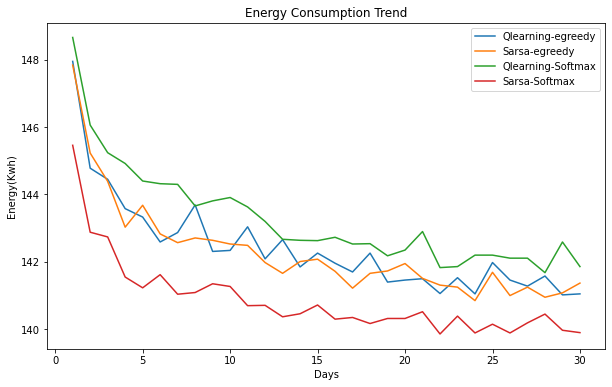

In [56]:
fig, axs = plt.subplots(figsize=(10, 6))
sns.lineplot(x='Days', y='Energy(KWh)_qg', data=merged_df2, ax=axs, label='Qlearning-egreedy')
sns.lineplot(x='Days', y='Energy(KWh)_sg', data=merged_df2, ax=axs, label='Sarsa-egreedy')
sns.lineplot(x='Days', y='Energy(KWh)', data=merged_df2, ax=axs, label='Qlearning-Softmax')
sns.lineplot(x='Days', y='Energy(KWh)_ss', data=merged_df2, ax=axs, label='Sarsa-Softmax')

# Add a title and labels
axs.set_title('Energy Consumption Trend')
axs.set_xlabel('Days')
axs.set_ylabel('Energy(Kwh)')

# Show the legend
axs.legend()

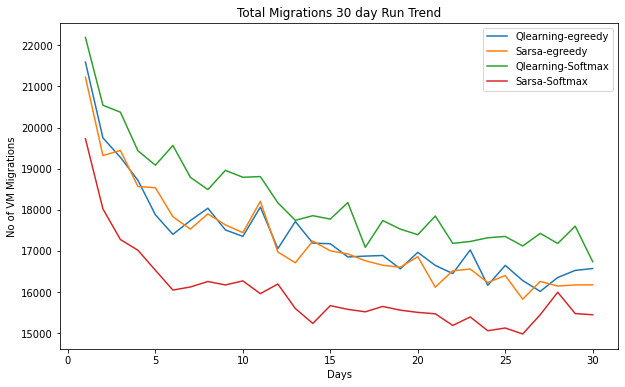

In [55]:
fig, axs = plt.subplots(figsize=(10, 6))
sns.lineplot(x='Days', y='Migrations_qg', data=merged_df2, ax=axs, label='Qlearning-egreedy')
sns.lineplot(x='Days', y='Migrations_sg', data=merged_df2, ax=axs, label='Sarsa-egreedy')
sns.lineplot(x='Days', y='Migrations', data=merged_df2, ax=axs, label='Qlearning-Softmax')
sns.lineplot(x='Days', y='Migrations_ss', data=merged_df2, ax=axs, label='Sarsa-Softmax')

# Add a title and labels
axs.set_title('Total Migrations 30 day Run Trend')
axs.set_xlabel('Days')
axs.set_ylabel('No of VM Migrations')

# Show the legend
axs.legend()

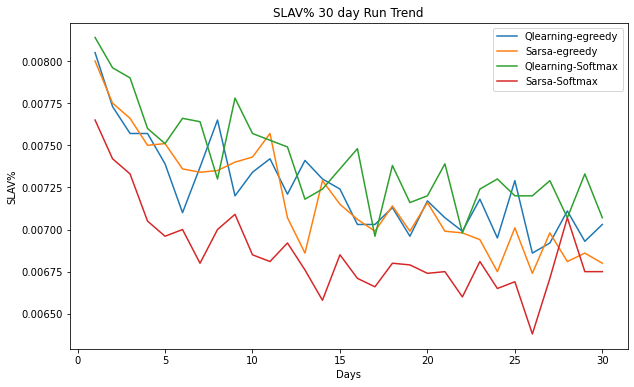

In [54]:
fig, axs = plt.subplots(figsize=(10, 6))
sns.lineplot(x='Days', y='SLA(%)_qg', data=merged_df2, ax=axs, label='Qlearning-egreedy')
sns.lineplot(x='Days', y='SLA(%)_sg', data=merged_df2, ax=axs, label='Sarsa-egreedy')
sns.lineplot(x='Days', y='SLA(%)', data=merged_df2, ax=axs, label='Qlearning-Softmax')
sns.lineplot(x='Days', y='SLA(%)_ss', data=merged_df2, ax=axs, label='Sarsa-Softmax')

# Add a title and labels
axs.set_title('SLAV% 30 day Run Trend')
axs.set_xlabel('Days')
axs.set_ylabel('SLAV%')

# Show the legend
axs.legend()

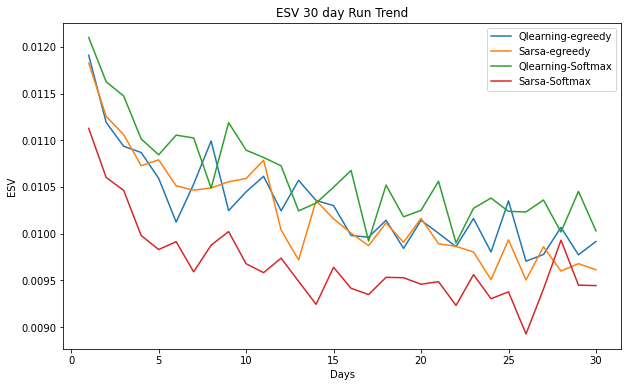

In [57]:
fig, axs = plt.subplots(figsize=(10, 6))
sns.lineplot(x='Days', y='ESV_qg', data=merged_df2, ax=axs, label='Qlearning-egreedy')
sns.lineplot(x='Days', y='ESV_sg', data=merged_df2, ax=axs, label='Sarsa-egreedy')
sns.lineplot(x='Days', y='ESV', data=merged_df2, ax=axs, label='Qlearning-Softmax')
sns.lineplot(x='Days', y='ESV_ss', data=merged_df2, ax=axs, label='Sarsa-Softmax')

# Add a title and labels
axs.set_title('ESV 30 day Run Trend')
axs.set_xlabel('Days')
axs.set_ylabel('ESV')

# Show the legend
axs.legend()

In [66]:
print(qlearning_egreedy['Energy(KWh)'].std())
print(sarsa_egreedy['Energy(KWh)'].std())
print(qlearning_softmax['Energy(KWh)'].std())
print(sarsa_softmax['Energy(KWh)'].std())

1.4412660462565352
1.4614765404073102
1.5153716588242676
1.153894156384344


In [65]:
print(qlearning_egreedy['Migrations'].std())
print(sarsa_egreedy['Migrations'].std())
print(qlearning_softmax['Migrations'].std())
print(sarsa_softmax['Migrations'].std())

1189.0466233137342
1211.2542259988197
1230.6777144247026
979.9824746263132


In [67]:
print(qlearning_egreedy['SLA(%)'].std())
print(sarsa_egreedy['SLA(%)'].std())
print(qlearning_softmax['SLA(%)'].std())
print(sarsa_softmax['SLA(%)'].std())

0.0002746533865777386
0.00032000790220128067
0.00028749192892219135
0.00025973040841894364


In [68]:
print(qlearning_egreedy['ESV'].std())
print(sarsa_egreedy['ESV'].std())
print(qlearning_softmax['ESV'].std())
print(sarsa_softmax['ESV'].std())

0.0004946191677597075
0.0005573767106282253
0.000519902756336619
0.000443748649542966
